<a href="https://www.kaggle.com/code/mrsalty/eda-milan-expats-by-neighbourhood-1999-2023?scriptVersionId=172892510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA | Milan expats by neighbourhood (1999-2023)

Exploration of Milan expats data from City of Milan [Open Data platform](https://dati.comune.milano.it/)

<img src="https://www.yesmilano.it/sites/default/files/styles/testata_full/public/itinerario/copertina/6298/23579/posti-da-vedere-fotografare-a-milano-di-notte.jpg?itok=wP9aMJ1Z" width="500">

### Neighborhoods map (municipi)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Milano_-_mappa_municipi.png/1331px-Milano_-_mappa_municipi.png?20210607043004" alt="municipi (nighrborohoods)" width="500"/>

In [1]:
# imports
import csv
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb 

from matplotlib.pyplot import figure

In [2]:
# settings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/milan-expats-citizens-neighbourhoods-1999-2023/ds29_pop_sto_zona_1999_2023.csv',sep=';',on_bad_lines='skip')
df.head()

,Anno,Municipio,Eta,Genere,Cittadinanza,Residenti
0,1999,1,0,Femmine,Albania,1
1,1999,1,0,Femmine,Bangladesh,1
2,1999,1,0,Femmine,Brasile,1
3,1999,1,0,Femmine,Bulgaria,1
4,1999,1,0,Femmine,"Cinese, Rep. Popolare",8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102752 entries, 0 to 1102751
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Anno          1102752 non-null  int64 
 1   Municipio     1102752 non-null  int64 
 2   Eta           1102752 non-null  object
 3   Genere        1102752 non-null  object
 4   Cittadinanza  1102752 non-null  object
 5   Residenti     1102752 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 50.5+ MB


In [5]:
df.describe()

,Anno,Municipio,Residenti
count,1.102752e+06,1.102752e+06,1.102752e+06
mean,2.011961e+03,5.066757e+00,3.051749e+01
std,7.180475e+00,2.567751e+00,1.382577e+02
min,1.999000e+03,1.000000e+00,1.000000e+00
25%,2.006000e+03,3.000000e+00,1.000000e+00
50%,2.012000e+03,5.000000e+00,2.000000e+00
75%,2.018000e+03,7.000000e+00,5.000000e+00
max,2.023000e+03,9.000000e+00,1.558000e+03


In [6]:
# top 10 expat groups
arr_citizens_sorted_10 = (df[df.Cittadinanza!='Italia'] \
    .groupby(['Cittadinanza'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False) \
    .head(10))['Cittadinanza'] \
    .to_numpy()


# top 5 expat groups
arr_citizens_sorted_5 = (df[df.Cittadinanza!='Italia'] \
    .groupby(['Cittadinanza'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False) \
    .head(5))['Cittadinanza'] \
    .to_numpy()

In [7]:
# clean Eta
df.loc[df['Eta'] == '100 e più', 'Eta'] = 100

## Dataset analysis

<Figure size 400x200 with 0 Axes>

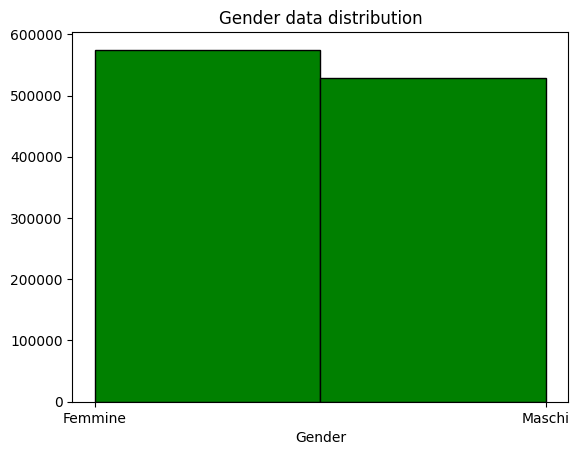

<Figure size 400x200 with 0 Axes>

In [8]:
plt.hist(x=df['Genere'], color = 'g', edgecolor = 'black', bins = 2)
plt.title('Gender data distribution')
plt.xlabel("Gender")
plt.figure(figsize=(4,2))

<Figure size 400x200 with 0 Axes>

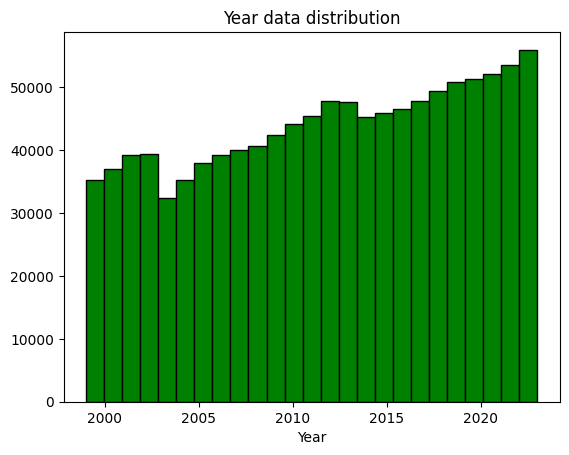

<Figure size 400x200 with 0 Axes>

In [9]:
plt.hist(x=df['Anno'].astype(int), color = 'g', edgecolor = 'black', bins = 25)
plt.title('Year data distribution')
plt.xlabel("Year")
plt.figure(figsize=(4,2))

<Figure size 400x200 with 0 Axes>

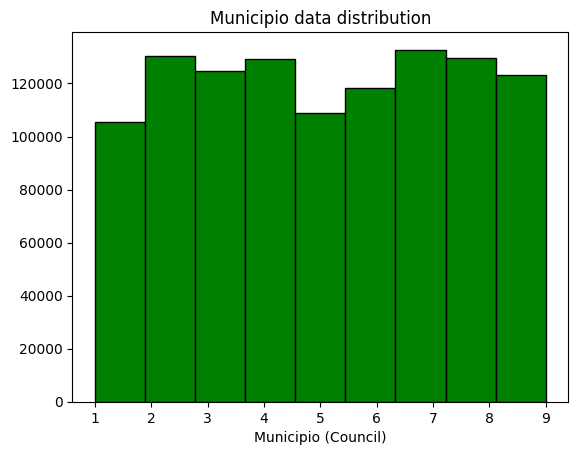

<Figure size 400x200 with 0 Axes>

In [10]:
plt.hist(x=df['Municipio'].astype(int), color = 'g', edgecolor = 'black', bins = 9)
plt.title('Municipio data distribution')
plt.xlabel("Municipio (Council)")
plt.figure(figsize=(4,2))

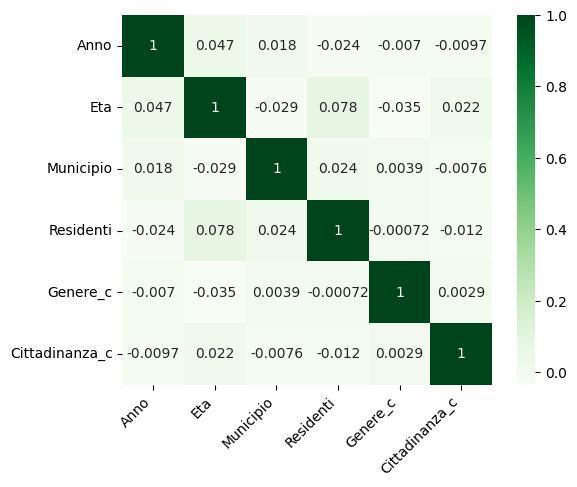

In [11]:
df_corr = df[['Anno','Eta','Municipio','Residenti']]
df_corr['Genere_c'] = df['Genere'].astype('category').cat.codes
df_corr['Cittadinanza_c'] = df['Cittadinanza'].astype('category').cat.codes

ax = sns.heatmap(df_corr.corr(), cmap= 'Greens', annot = True, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# Data analysis

## Citizenship historical data

<Axes: xlabel='Anno', ylabel='Residenti'>

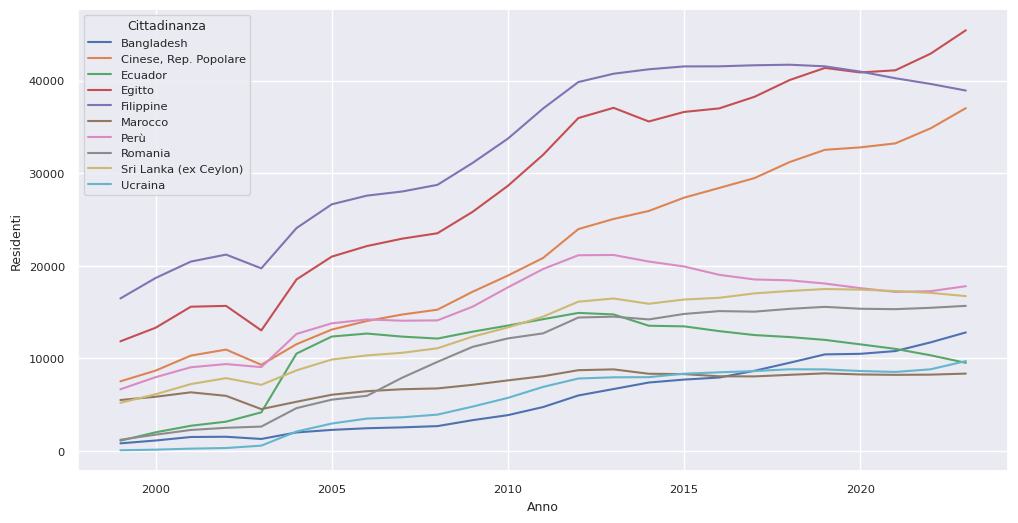

In [12]:
df_agg = df[(df['Cittadinanza'].isin(arr_citizens_sorted_10))].groupby(['Anno','Cittadinanza'])['Residenti'].sum().reset_index(name ='Residenti')
sns.set(font_scale=0.75)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agg, x="Anno", y="Residenti", hue="Cittadinanza" )

## Citizens by neighborhood (All years)

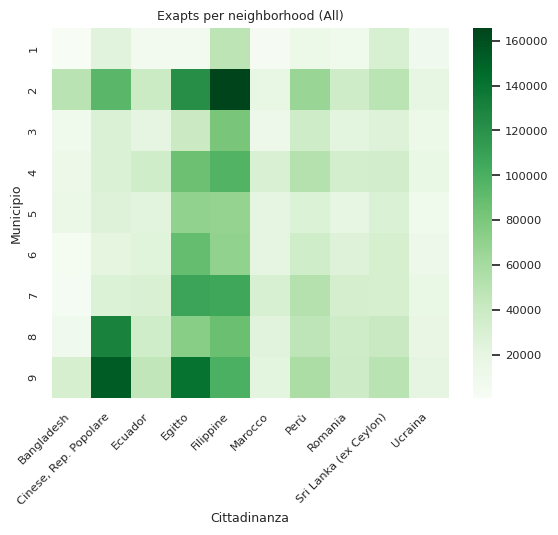

In [13]:
#all
df_all = df[(df['Cittadinanza'].isin(arr_citizens_sorted_10))] \
    .groupby(['Cittadinanza','Municipio'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)

ds_all = df_all.pivot(index="Municipio", columns="Cittadinanza", values="Count")
ax = sns.heatmap(ds_all, cmap="Greens")
ax.set_title('Exapts per neighborhood (All)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

## Citizens by neighborhood (2023)

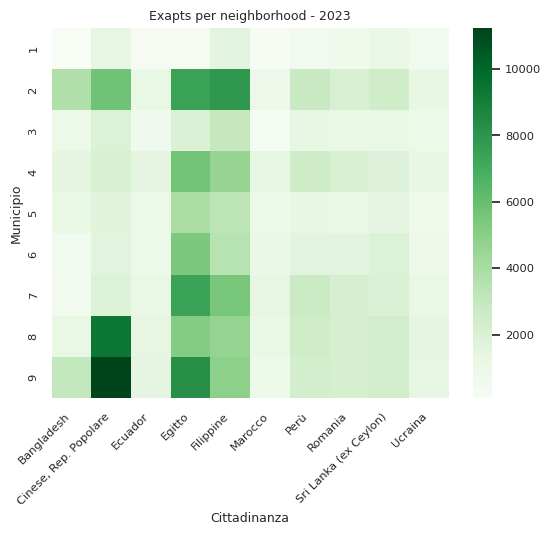

In [14]:
#all
df_all = df[(df['Cittadinanza'].isin(arr_citizens_sorted_10)) & (df['Anno']==2023)] \
    .groupby(['Cittadinanza','Municipio'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)

ds_all = df_all.pivot(index="Municipio", columns="Cittadinanza", values="Count")
ax = sns.heatmap(ds_all, cmap="Greens")
ax.set_title('Exapts per neighborhood - 2023')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

## Expats by age group (all years)

Text(0.5, 1.0, 'Expats by age')

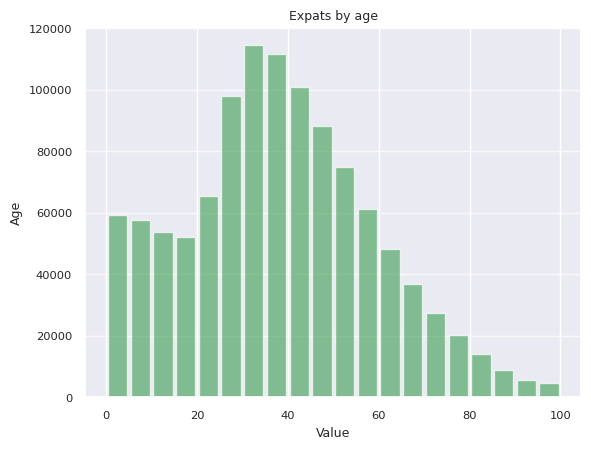

In [15]:
bins = [0, 10, 20, 40, 60, 100]

df['Eta_binned'] = pd.cut(df['Eta'].astype(int), bins)

n, bins, patches = plt.hist(x=df['Eta'].astype(int), bins=20, color='g',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Age')
plt.title('Expats by age')

## Expats age vs country of origin (2023)

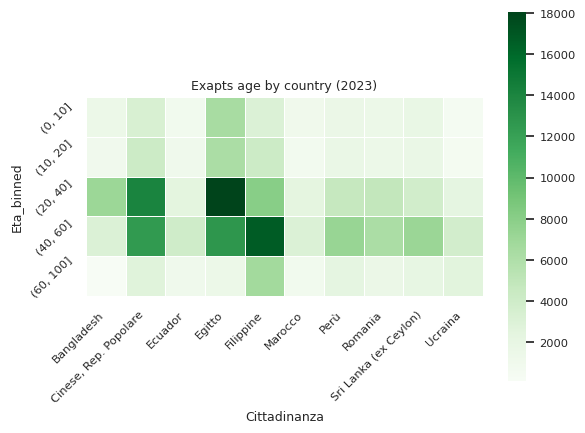

In [16]:
sns.set(font_scale=0.75)
df_age = df[(df['Cittadinanza'].isin(arr_citizens_sorted_10)) & (df['Anno']==2023)] \
    .groupby(['Cittadinanza','Eta_binned'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)

ds_all = df_age.pivot(index="Eta_binned", columns="Cittadinanza", values="Count")
ax = sns.heatmap(ds_all, linewidth=.5, cmap="Greens", square=True)
ax.set_title('Exapts age by country (2023)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right');


## Males vs females by neighborhood

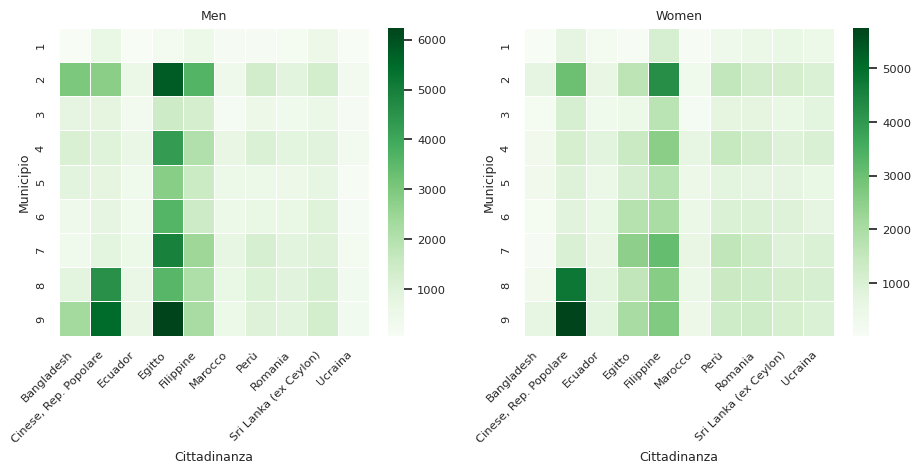

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
#men
df_men = df[(df['Cittadinanza'].isin(arr_citizens_sorted_10)) & (df['Genere'] == 'Maschi') & (df['Anno']==2023)] \
    .groupby(['Cittadinanza','Municipio','Genere'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)
ds_men = df_men.pivot(index="Municipio", columns="Cittadinanza", values="Count")
ax = sns.heatmap(ds_men, linewidth=.5, ax=ax1, cmap="Greens")
ax.set_title('Men')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#women
df_women = df[(df['Cittadinanza'].isin(arr_citizens_sorted_10)) & (df['Genere'] == 'Femmine') & (df['Anno']==2023)] \
    .groupby(['Cittadinanza','Municipio','Genere'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)
ds_women = df_women.pivot(index="Municipio", columns="Cittadinanza", values="Count")
ax = sns.heatmap(ds_women, linewidth=.5, ax=ax2, cmap="Greens")
ax.set_title('Women')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
#print(hm_men)

## Males vs females trends

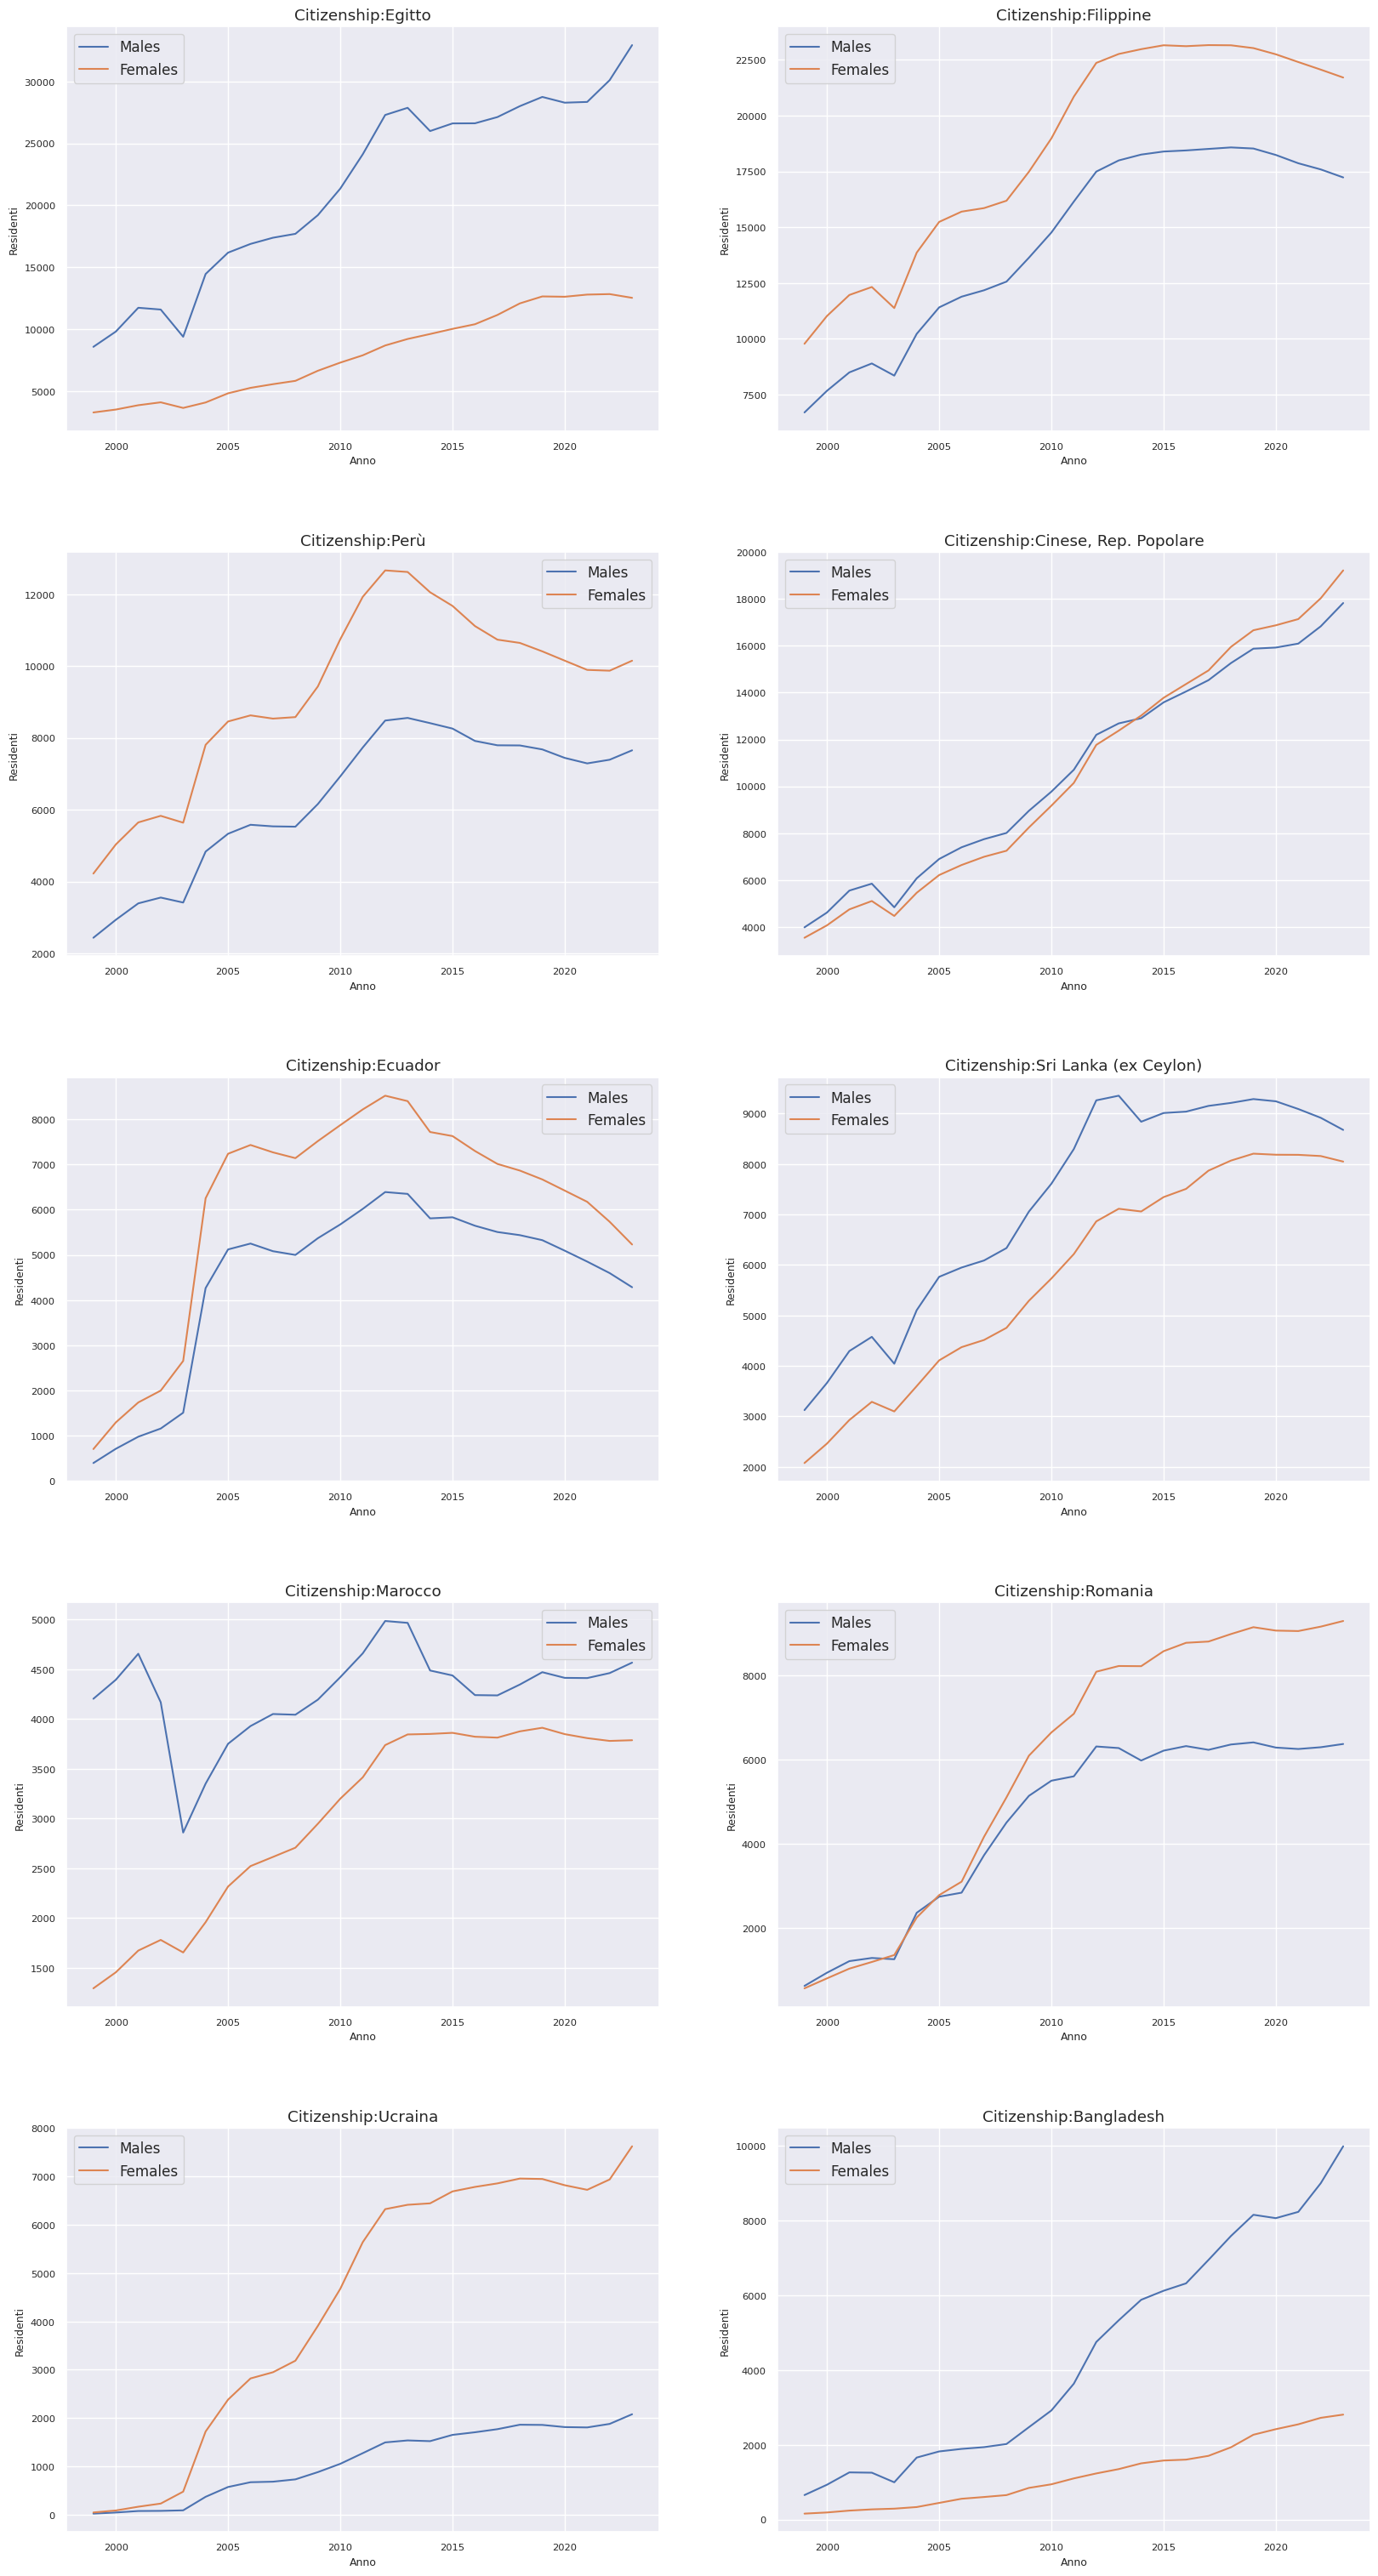

In [18]:
f,ax=plt.subplots(5,2,figsize=(16,30))
f.tight_layout()
f.subplots_adjust(wspace=0.2,hspace=0.3)
sns.set(font_scale=1.1)
for i,cit in enumerate(arr_citizens_sorted_10):
    pos_l = int(i/2)
    pos_r = int(i%2==0)
    men = df[(df['Cittadinanza'] == cit) & (df['Genere'] == 'Maschi')].groupby(['Anno','Cittadinanza'])['Residenti'].sum().reset_index(name ='Residenti')
    women = df[(df['Cittadinanza'] == cit) & (df['Genere'] == 'Femmine')].groupby(['Anno','Cittadinanza'])['Residenti'].sum().reset_index(name ='Residenti')
    sns.lineplot(data= men, x=men['Anno'], y=men['Residenti'], ax=ax[pos_l,pos_r], label='Males')
    sns.lineplot(data= men, x=men['Anno'], y=women['Residenti'], ax=ax[pos_l,pos_r], label='Females')
    ax[pos_l,pos_r].set_title(f'Citizenship:{cit}')

## Immigration trend by neighborhood and citizenship

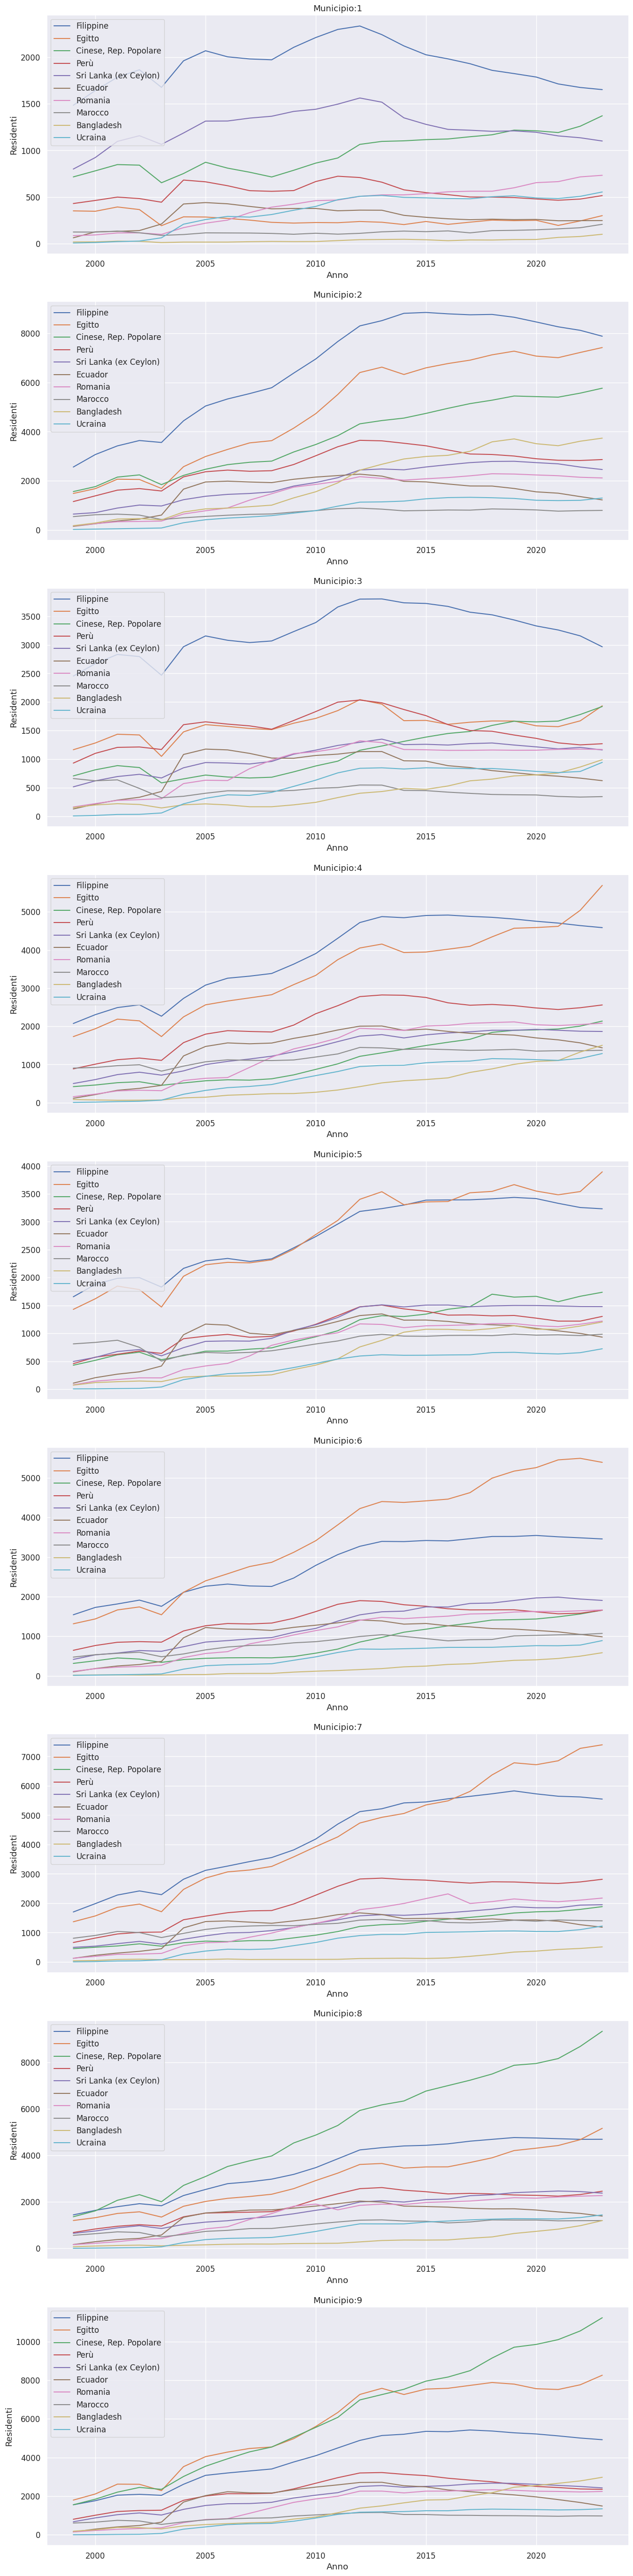

In [19]:
f,ax=plt.subplots(len(df['Municipio'].unique()),1,figsize=(16,70))
#sns.set(font_scale=0.85)
for i,mun in enumerate(df['Municipio'].unique()):
    for j,cit in enumerate(arr_citizens_sorted_10):
        all = df[((df['Municipio'] == mun) & (df['Cittadinanza']==cit))].groupby(['Anno'])['Residenti'].sum().reset_index(name ='Residenti')
        sns.lineplot(data= all, x=all['Anno'], y=all['Residenti'], ax=ax[i], label=cit)
    ax[i].set_title(f'Municipio:{mun}')